<a href="https://colab.research.google.com/github/LosPowerPeralta/ADA-Informes-Matias/blob/main/Informe_MergeSort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de ordenamiento

Los problemas de ordenamiento desde hace mucho tiempo llevan siendo un desafío para los programadores ya que siempre se intenta buscar algún algoritmo el cual pueda resolverlos de la forma más rápida posible con el menor tiempo.

Por esta misma razón Martínez Vidal creo el metodo de ordenamiento por inserción el cual consiste en ordenar un arreglo de n números como si fuese un mazo de cartas.

Entrada: una secuencia de n números $[a_1, a_2,...,a_n]$

Salida: Retorna la misma secuencia de número ordenados de menor a mayor o viceversa.

#2. MergeSort


##2.1. Descripción del algoritmo

El MergeSort es un algoritmo recursivo el cual va dividiendo un arreglo de tamaño $n$ en sub-arreglos de largo $m = n/2$ hasta lograr un arreglo de tamaño 1, llegados a este punto la función llama a otra auxiliar llamada Merge la cual se encargará de reodenar los datos generados por los sub-arreglos recibidos hasta tener todos los datos ordenados del arreglo original de menor a mayor (o de mayor a menor dependiendo del caso).

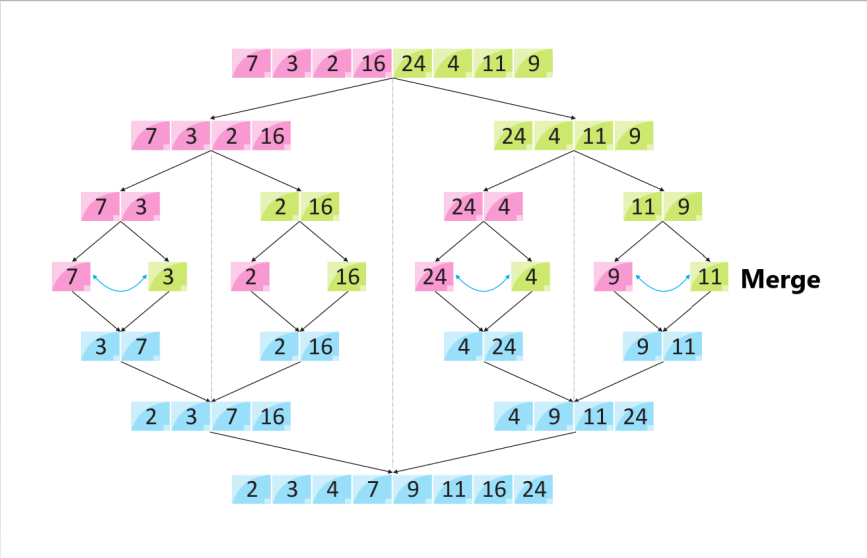

## 2.2. Codigo

In [56]:
import random as rd
import matplotlib.pyplot as plt
import datetime
import math as mt
from timeit import repeat
from termcolor import colored

In [57]:
def Merge(lista1, lista2, cont, verbose = False):
  i, j = 0, 0
  resultante = []

  if verbose:
    print("INGRESO DE LA FUNCIÓN MERGE\n")
    print("Entrada: Lista 1: ", str(lista1)[1:-1])
    print("         Lista 2: ", str(lista2)[1:-1], "\n")

  while (i < len(lista1) and j < len(lista2)):
    cont += 1

    if verbose:
      if len(lista1) == 1 and len(lista2) == 1:
        print(colored(f"{str(lista1[i])}", "red"),"  <=  ",  colored(f"{str(lista2[j])}", "red"), "?")
      elif i == 0 and j == 0:
        print(colored(f"{str(lista1[i])}", "red"),",", str(lista1[i + 1:])[1:-1],"  <=  ",  colored(f"{str(lista2[j])}", "red"),",", str(lista2[j + 1:])[1:-1], "?")
      elif i == 0 and j > 0:
        print(colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"), ",",str(lista2[j + 1:])[1:-1], "?")
      elif i > 0 and j == 0:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"),",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?")
      else:
        print(str(lista1[:i])[1:-1],",",colored(f"{str(lista1[i])}", "red"), ",",str(lista1[i + 1:])[1:-1],"  <=  ", str(lista2[:j])[1:-1],",", colored(f"{str(lista2[j])}", "red"),",",str(lista2[j + 1:])[1:-1], "?") 
      print("")

    if lista1[i] <= lista2[j]:
      resultante.append(lista1[i])
      i += 1 
    else:
      resultante.append(lista2[j])
      j += 1
    
    if verbose: 
      print("Resultante: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  resultante += lista1[i:]
  resultante += lista2[j:]

  if verbose: 
    print("Salida función Merge: ", colored(f"{str(resultante)[1:-1]}", "blue"), "\n")

  return resultante, cont

In [58]:
def MergeSort(lista,cont = 0,verbose = False):
  if (len(lista) == 1): return lista, cont

  if verbose:
    print("Entrada: ", str(lista)[1:-1], "\n")

  q = len(lista) // 2
  cont += 1
  if verbose: 
    print("Parte Derecha: ", colored(f"{str(lista[:q])[1:-1]}", "green"))
    print("Parte Izquierda: ", colored(f"{str(lista[q:])[1:-1]}", "yellow"), "\n")
    listaD, cont = MergeSort(lista[:q],cont, verbose= True)
  else:
    listaD, cont = MergeSort(lista[:q],cont)
  if verbose: 
    listaI, cont = MergeSort(lista[q:],cont, verbose= True)
  else:
    listaI, cont = MergeSort(lista[q:],cont)
  
  if verbose:
    return Merge(listaD, listaI, cont,verbose= True)
  else:
    return Merge(listaD, listaI, cont)

##2.3. Ejemplo

Para comenzar utilizaremos el siguiente arreglo.

$A = [4,8,1,2,3,5]$

Al ser recibido por la función MergeSort este los dividirá en 2 sub-arreglos los cuales volverán a ser divididos hasta que quede 1 en cada lado.

$[4,8,1] ... [2,3,5]$

$[4,8] ... [1] ... [2,3] ... [5]$

$[4] ... [8] ... [1] ... [2] ... [3] ... [5]$

Luego de dejar el arreglo anterior subdividido en arreglos de largo 1 la Función MergeSort hará el llamado de la función Merge la cual se encargará de reodenar todos los arreglos.

$[4,8] ... [1,2] ... [5]$

$[1,2,4,8] ... [5]$

$A = [1,2,4,5,8]$

Y una vez que el codigo ya haya reordenado todos los elementos de menor a mayor de los sub-arreglos este finalizará su ejecución.








##2.4. Ejecución del algoritmo paso a paso (Verbose = True)

In [59]:
A = [4,8,1,2,3,5]

A = MergeSort(A, verbose= True)

Entrada:  4, 8, 1, 2, 3, 5 

Parte Derecha:  4, 8, 1
Parte Izquierda:  2, 3, 5 

Entrada:  4, 8, 1 

Parte Derecha:  4
Parte Izquierda:  8, 1 

Entrada:  8, 1 

Parte Derecha:  8
Parte Izquierda:  1 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  8
         Lista 2:  1 

8   <=   1 ?

Resultante:  1 

Salida función Merge:  1, 8 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  4
         Lista 2:  1, 8 

4 ,    <=   1 , 8 ?

Resultante:  1 

4 ,    <=   1 , 8 ,  ?

Resultante:  1, 4 

Salida función Merge:  1, 4, 8 

Entrada:  2, 3, 5 

Parte Derecha:  2
Parte Izquierda:  3, 5 

Entrada:  3, 5 

Parte Derecha:  3
Parte Izquierda:  5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  3
         Lista 2:  5 

3   <=   5 ?

Resultante:  3 

Salida función Merge:  3, 5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  2
         Lista 2:  3, 5 

2 ,    <=   3 , 5 ?

Resultante:  2 

Salida función Merge:  2, 3, 5 

INGRESO DE LA FUNCIÓN MERGE

Entrada: Lista 1:  1, 4, 8
         Lista 2:

#3. Tiempo de Ejecución

##Teorema (Tiempo de ejecución)

El tiempo de ejecución de todos los casos del MergeSort tienen una complejidad de $O(nlogn)$.

##Prueba del teorema

Teniendo en cuenta el funcionamiento del algoritmo, este no nos deja del todo claro cual es su mejor caso, peor caso o caso promedio ya que sin importar que tan ordenado se encuentre si o si el arreglo principal será subdividido hasta conseguir arreglos de tamaño 1. Por esta razón comprobaremos que el teorema mencionado anteriormente es verdadero con algunos casos de prueba.

In [60]:
for n in range(1,15):
  x = random.sample(range(1, 100), n)
  x, cont = MergeSort(x)
  n * mt.log2(n)
  print("Caso",n,":",x)
  print("Comparaciones y divisiones =", cont, ", Aproximación matemática =", (n * mt.log2(n)) // 1, "\n")

Caso 1 : [85]
Comparaciones y divisiones = 0 , Aproximación matemática = 0.0 

Caso 2 : [8, 67]
Comparaciones y divisiones = 2 , Aproximación matemática = 2.0 

Caso 3 : [8, 32, 48]
Comparaciones y divisiones = 4 , Aproximación matemática = 4.0 

Caso 4 : [37, 62, 87, 99]
Comparaciones y divisiones = 8 , Aproximación matemática = 8.0 

Caso 5 : [41, 44, 49, 70, 80]
Comparaciones y divisiones = 11 , Aproximación matemática = 11.0 

Caso 6 : [1, 4, 31, 39, 50, 59]
Comparaciones y divisiones = 16 , Aproximación matemática = 15.0 

Caso 7 : [2, 3, 48, 56, 66, 67, 72]
Comparaciones y divisiones = 18 , Aproximación matemática = 19.0 

Caso 8 : [11, 20, 24, 39, 48, 51, 78, 93]
Comparaciones y divisiones = 22 , Aproximación matemática = 24.0 

Caso 9 : [3, 5, 24, 30, 38, 44, 50, 61, 63]
Comparaciones y divisiones = 28 , Aproximación matemática = 28.0 

Caso 10 : [12, 28, 29, 40, 47, 67, 70, 87, 92, 97]
Comparaciones y divisiones = 30 , Aproximación matemática = 33.0 

Caso 11 : [5, 13, 19, 42,

Como se puede apreciar en todos los casos de prueba anteriores, el número de comparaciones y de divisiones dentro de la función merge es semejante a la aproximación matemática que nos da la complejidad. Por lo tanto podemos asumir que la complejidad tanto del mejor como del peor caso es exactamente la misma $O(nlogn)$.




#4. Correctitud

**Teorema de (Correctitud)**

El algoritmo MergeSort genera un arreglo: $[a_1',a_2',...,a_n']$, con los mismo elementos del arreglo de entrada ordenados de menor a mayor, es decir, $a_1',a_2',...,a_n'$.

#Prueba del Teorema

Previamente observamos que el algoritmo por cada llamada a la función MergeSort el arreglo ser irá subdividiendo hasta obtener arreglos de tamaño 1 y poco a poco la función merge los irá ordenando.

Por lo tanto para demostrar la correctitud de la función MergeSort utilizaremos el método de demostración por inducción matemática y para la función Merge se utilizará la propiedad del bucle invariante.

##Prueba del teorema (Función Merge)

La función Merge tiene como entrada 2 arreglos los cuales serán ordenados de dentro de un nuevo arreglo.

Su proposito es buscar dentro de cada arreglo el menor valor para que de esta forma ser colocado en el arreglo resultante.

Para probarlo con la propiedad del bucle invariante, primero debes analizar la inicialización $(i = 0$ y $j = 0)$ de nuestro bucle y por último comprobar si este se mantiene durante la ejecución del mismo.


> Al comienzo de cada iteración $i$ y $j$ del bucle donde $i$ es el indice del primer arreglo y $j$ del segundo, el arreglo resultante debe encontrarse ordenado de menor a mayor.

**Inicialización**

Al comienzo de la primera iteración $(i = 0$ y $j = 0)$, los $i + j$ primeros elementos del nuevo arreglo se encontrarán ordenados. Esto es trivialmente cierto ya que estamos considerando un solo elemento.

**Mantención**

Empezamos considerando que al principio de cada iteración $i$ y $j$ se cumple la propiedad, es decir que los primeros elementos del arreglo resultante se encuentran ordenados de menor a mayor. En este caso consideraremos a $X$ como menor dato y a $Y$ como mayor de los dos arreglos (como se muestra en la figura).

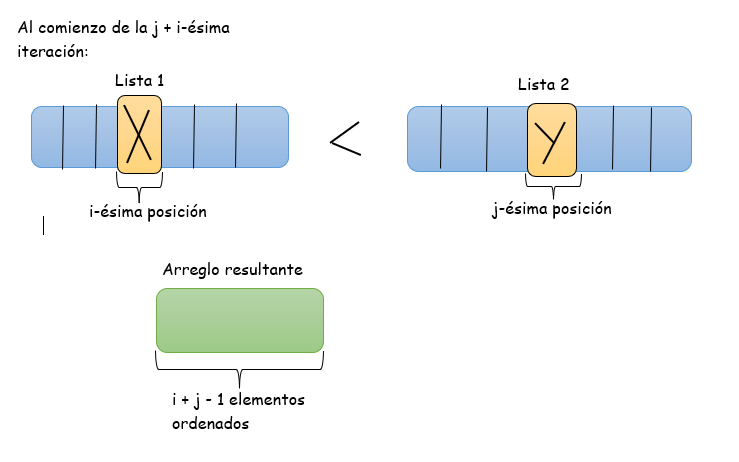

Durante la iteración de la función Merge el menor dato de los dos arreglos (osea $X$) será posicionado al final del arreglo resultante.

Al finalizar la iteración (y al comienzo de la siguiente), se seguirá cumpliendo la prioridad invariante.

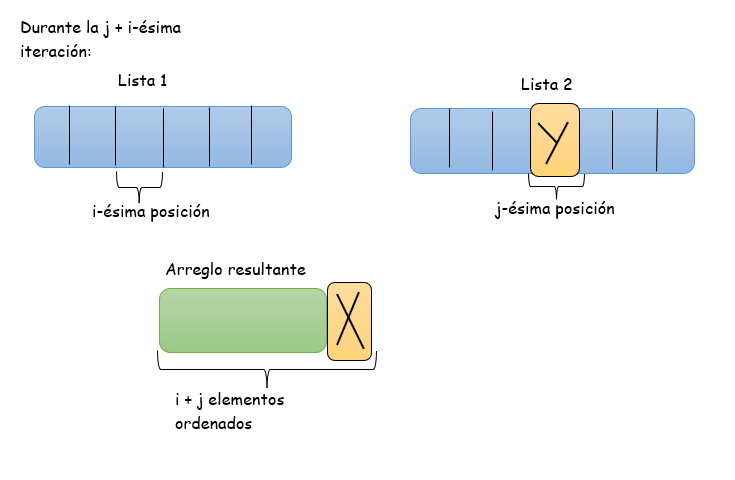

##Prueba del teorema (Función MergeSort)

En inducción matemática para probar una declaración $P(n)$, para todos los números naturales $n$ debemos realizar los siguientes pasos.

1.   Probar $P(n)$ con un caso base, por ejemplo $P(1)$.
2.   Probar si $P(m)$ es cierto para $m < n$, por lo tanto para $P(n)$ esto también estará correcto.

para nuestro caso base $P(1)$, como la función MergeSort recibe un arreglo de largo 1, está considera directamente que se encontrará ordenado. Por lo tanto se cumple $P(1)$.


Para nuestro segundo caso, considerando que nuestra función MergeSort recibe un arreglo de largo $n$, este lo irá subdividiendo en subarreglos de tamaño $m = [\frac{n}{2}]$ hasta conseguir arreglos de largo 1 para luego ser combinados y reordenados con la función Merge la cual ya tiene comprobada su correctitud.





